# Isolation Forest for Traffic Anomaly Detection

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing as pp
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

## Load Data

In [2]:
attack = 'Video_Injection'
data = pd.read_csv('../Datasets/kitsune_dataset/Video_Injection/Video_Injection_dataset.csv', index_col=0, dtype=np.float32)
labels = pd.read_csv('../Datasets/kitsune_dataset/Video_Injection/Video_Injection_labels.csv', index_col=0, dtype=np.int32)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2472400 entries, 1.9958120584487915 to 75.57029724121094
Columns: 114 entries, 2.090000000000000000e+02 to 0.000000000000000000e+00.54
dtypes: float32(114)
memory usage: 1.1 GB


In [4]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2472401 entries, 1 to 2472401
Data columns (total 1 columns):
 #   Column  Dtype
---  ------  -----
 0   x       int32
dtypes: int32(1)
memory usage: 28.3 MB


## Scale Data

In [5]:
scaler = pp.MinMaxScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data)
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,104,105,106,107,108,109,110,111,112,113
count,2.472400e+06,2.472400e+06,2.472400e+06,2.472400e+06,2.472400e+06,2.472400e+06,2.472400e+06,2.472400e+06,2.472400e+06,2.472400e+06,...,2.472400e+06,2.472400e+06,2.472400e+06,2.472400e+06,2.472400e+06,2.472400e+06,2.472400e+06,2.472400e+06,2.472400e+06,2.472400e+06
mean,8.733656e-01,3.675713e-01,5.257249e-01,8.860090e-01,3.753582e-01,6.744325e-01,9.252460e-01,3.754186e-01,7.937989e-01,9.264826e-01,...,3.731871e-01,7.184815e-13,9.301201e-09,9.178560e-01,9.207003e-01,6.093212e-01,9.207093e-01,3.726928e-01,6.007793e-13,5.304919e-09
std,4.714009e-02,6.159493e-02,1.740824e-01,4.487546e-02,4.835786e-02,2.012635e-01,4.453947e-02,3.233073e-02,2.413240e-01,4.398568e-02,...,2.924100e-02,2.096114e-15,2.444375e-11,1.798451e-01,5.446147e-02,3.768489e-02,5.432195e-02,2.780335e-02,1.410807e-15,1.372924e-11
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.609566e-01,3.258551e-01,3.332576e-01,8.771445e-01,3.424940e-01,4.171281e-01,9.206188e-01,3.566503e-01,4.888167e-01,9.272798e-01,...,3.615977e-01,7.184797e-13,9.301225e-09,9.578005e-01,9.233192e-01,6.030940e-01,9.233192e-01,3.637224e-01,6.007824e-13,5.304937e-09
50%,8.752952e-01,3.661426e-01,5.588048e-01,8.880399e-01,3.746265e-01,7.837327e-01,9.281665e-01,3.744334e-01,9.720978e-01,9.295607e-01,...,3.729704e-01,7.184797e-13,9.301225e-09,9.877922e-01,9.253179e-01,6.085464e-01,9.253179e-01,3.703288e-01,6.007824e-13,5.304937e-09
75%,8.918788e-01,4.056730e-01,6.572840e-01,9.002716e-01,4.065409e-01,8.321863e-01,9.342614e-01,3.965056e-01,9.790508e-01,9.326009e-01,...,3.814797e-01,7.184797e-13,9.301225e-09,9.922999e-01,9.271823e-01,6.159188e-01,9.271823e-01,3.793560e-01,6.007824e-13,5.304937e-09
max,9.999999e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01,...,9.999999e-01,1.436940e-12,1.860220e-08,1.000000e+00,9.999999e-01,1.000000e+00,9.999999e-01,1.000000e+00,1.002420e-12,1.035936e-08


## Train-Test Split

In [6]:
# drop the last row
labels=labels[:-1]
labels.tail(5)
# train-test split
X_train, X_test, y_train, y_test = train_test_split(data, labels, shuffle=False, test_size=0.3)

In [7]:
# anomaly counts
print(f'Number anomalies in train data: {y_train.sum()}')
print(f'Number anomalies in test data: {y_test.sum()}')

Number anomalies in train data: x    0
dtype: int64
Number anomalies in test data: x    102498
dtype: int64


## Create Model

In [8]:
model = IsolationForest(max_samples=100, n_jobs=16)
model.fit(X_train)

IsolationForest(max_samples=100, n_jobs=16)

## Evaluate

In [9]:
predictions = model.predict(X_test)

In [10]:
# convert to 0-1
predictions = [0 if x>0 else 1 for x in predictions] 

In [11]:
# average precision score train
aps_test = average_precision_score(y_test, predictions)
print(f'Average precision score for test: {aps_test:.4f}')

Average precision score for test: 0.1553


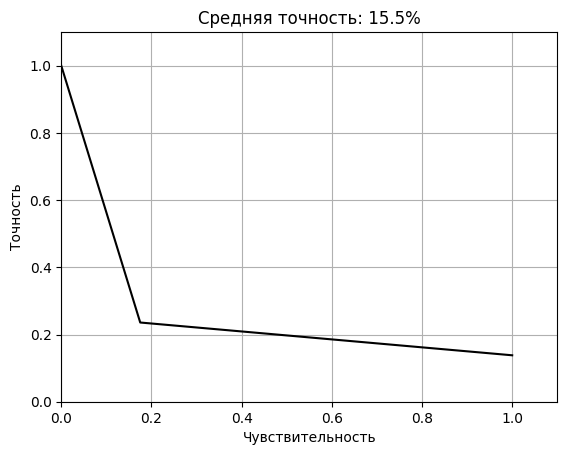

In [12]:
# precision-recall curve for test results
precision, recall, thresholds = precision_recall_curve(y_test, predictions)
plt.title(f'Средняя точность: {aps_test*100:.1f}%')
plt.xlabel('Чувствительность')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('Точность')
#plt.ylim([0, 1.1])
#plt.xlim([0, 1.0])
plt.grid()
plt.plot(recall, precision, color='k')
plt.savefig('IF_' + attack + '_AP.png')
plt.show()

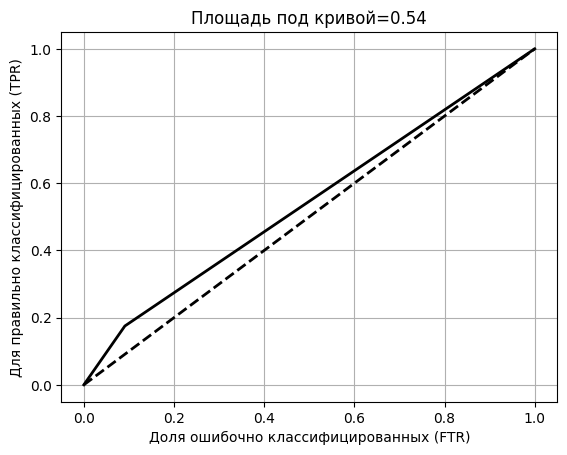

In [13]:
# receiver operational characteristic
fpr, tpr, thresholds = roc_curve(y_test, predictions)
auROC = auc(fpr, tpr)
plt.figure()
plt.title(f'Площадь под кривой={auROC:.2f}')
plt.plot(fpr, tpr, color='k', lw=2)
plt.xlabel('Доля ошибочно классифицированных (FTR)')
plt.ylabel('Для правильно классифицированных (TPR)')
plt.plot([0,1], [0,1], color='k', lw=2, linestyle='--')
plt.grid()
plt.savefig('IF_' + attack + '_AUC.png')
plt.show()